# Inside Airbnb Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("listings.csv")
data.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


## 1. Data Cleaning

Identify a group of missing columns, some columns are dropped because they have multiple mis-spellings

In [3]:
columns_to_drop = ["listing_url",'scrape_id','last_scraped','thumbnail_url',"host_acceptance_rate",'medium_url','picture_url','xl_picture_url','host_url',
                 'host_thumbnail_url', 'host_picture_url','host_id','host_name','latitude','longitude','is_location_exact','calendar_last_scraped',
                  'requires_license','license','jurisdiction_names','minimum_minimum_nights','maximum_minimum_nights',
                   'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',"neighbourhood","state","zipcode",
                  'host_location',"host_since","first_review","last_review"]

In [4]:
cleaned_data = data.drop(columns_to_drop, axis=1)
cleaned_data.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,NaN,The number 17 and #13 tram stop right outside ...,The apartment is about 75 meters or 800 square...,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...","cental station aprox. 10 minutes on foot, buss...","Your own apartment, nothing shared",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,Washing and drying are for a flat fee of €15 p...,NaN,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


In [5]:
cleaned_data.describe()

,id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.067700e+04,20665.000000,20665.000000,0.0,20677.000000,20671.000000,20669.000000,20669.000000,386.000000,20677.000000,...,17852.000000,17840.000000,17847.000000,17842.000000,17842.000000,20677.000000,20677.000000,20677.000000,20677.000000,18084.000000
mean,1.791013e+07,7.010888,7.010888,NaN,2.879335,1.158580,1.454400,1.829213,548.435233,1.459351,...,9.469079,9.735762,9.789488,9.476124,9.177054,4.925134,4.492431,0.410988,0.021715,0.987736
std,1.041987e+07,37.729548,37.729548,NaN,1.314935,0.380091,0.894856,1.407580,555.655913,0.935662,...,0.867372,0.654358,0.610074,0.707655,0.808275,22.883678,22.710906,1.082794,0.237805,1.349155
min,2.818000e+03,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.340207e+06,1.000000,1.000000,NaN,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.240000
50%,1.774427e+07,1.000000,1.000000,NaN,2.000000,1.000000,1.000000,1.000000,484.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.540000
75%,2.601974e+07,2.000000,2.000000,NaN,4.000000,1.000000,2.000000,2.000000,861.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.070000
max,3.759099e+07,980.000000,980.000000,NaN,30.000000,15.000000,12.000000,32.000000,3229.000000,16.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,208.000000,206.000000,15.000000,8.000000,33.670000


In [6]:
#columns with more than 20 percent missing values
columns_to_drop2 = list(cleaned_data.columns[cleaned_data.isnull().mean()>0.2])
columns_to_drop2

['space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_neighbourhood',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit']

In [7]:
final_data = cleaned_data.drop(columns_to_drop2, axis = 1)

In [8]:
final_data.shape

(20677, 57)

In [9]:
#check frequencies of each categorical variable, want to get rid of those with almost only one value
most_common_freq = final_data.describe(include=[object]).loc["freq",]
near_zero_cate_columns = list(most_common_freq[most_common_freq>=0.95*final_data.shape[0]].index)
near_zero_cate_columns

['experiences_offered',
 'host_has_profile_pic',
 'city',
 'market',
 'smart_location',
 'country_code',
 'country',
 'bed_type',
 'has_availability',
 'is_business_travel_ready',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [10]:
#drop near-zero variance categorical columns except availability column
final_data_1 = final_data.drop(near_zero_cate_columns, axis = 1)

In [11]:
#columns woth missing values
m = final_data_1.isnull().mean()
m[m>0]

name                           0.001693
summary                        0.030420
description                    0.010591
host_is_superhost              0.000580
host_listings_count            0.000580
host_total_listings_count      0.000580
host_identity_verified         0.000580
bathrooms                      0.000290
bedrooms                       0.000387
beds                           0.000387
cleaning_fee                   0.179958
review_scores_rating           0.136190
review_scores_accuracy         0.136722
review_scores_cleanliness      0.136625
review_scores_checkin          0.137206
review_scores_communication    0.136867
review_scores_location         0.137109
review_scores_value            0.137109
cancellation_policy            0.000048
reviews_per_month              0.125405
dtype: float64

## 2. Data Engineering

In [12]:
final_data_1.columns

Index(['id', 'name', 'summary', 'description', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified', 'street',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'cal

In [13]:
import re

In [14]:
#make cleaning fee column as numeric, clean dollar sign, impute missing values as NaN
final_data_1.loc[:,"cleaning_fee"]= final_data_1["cleaning_fee"].apply(lambda x: float(x.split("$")[1]) if pd.notna(x) and re.search("$",str(x)) else None)
#make price column numeric
final_data_1.loc[:,"price"]= final_data_1["price"].apply(lambda x: x.split("$")[1] if pd.notna(x) and re.search("$",str(x)) else np.nan)

In [15]:
#prices with comma, get rid of comma
comma_ind = final_data_1["price"][final_data_1["price"].apply(lambda x:len(x)>=7)].index
final_data_1.loc[comma_ind,"price"] = final_data_1.loc[comma_ind,"price"].apply(lambda x: re.sub(",","",x))

In [16]:
final_data_1.loc[:,"price"] = final_data_1["price"].astype("float64")

### Make columns into the right category

In [17]:
#categorical columns
categorical_columns = ['host_is_superhost','host_identity_verified','property_type', 'room_type',
                      'instant_bookable','cancellation_policy']

In [18]:
final_data_1.loc[:,categorical_columns] = final_data_1[categorical_columns].apply(lambda x: x.astype('category'),axis='rows')

In [19]:
final_data_1.dtypes

id                                                 int64
name                                              object
summary                                           object
description                                       object
host_is_superhost                               category
host_listings_count                              float64
host_total_listings_count                        float64
host_verifications                                object
host_identity_verified                          category
street                                            object
neighbourhood_cleansed                            object
property_type                                   category
room_type                                       category
accommodates                                       int64
bathrooms                                        float64
bedrooms                                         float64
beds                                             float64
amenities                      

### Impute Missing Values

In [20]:
#missing values in review ratings seem to correspond to those listings with no reviews
#impute missing values, "" in string variables, mode for categorical variables, median for numeric variables
cate_missing_cols = ["host_is_superhost","host_identity_verified","cancellation_policy"]
num_missing_cols = ["host_listings_count","host_total_listings_count","bathrooms","bedrooms","beds","cleaning_fee",
                   'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location','review_scores_value',"reviews_per_month"]
str_missing_cols = ["name","summary","description"]

In [21]:
#impute missing values, "" in string variables, mode for categorical variables, median for numeric variables
final_data_1.loc[:,str_missing_cols] = final_data_1[str_missing_cols].fillna("")
final_data_1.loc[:,num_missing_cols] = final_data_1[num_missing_cols].fillna(final_data_1[num_missing_cols].median())
from sklearn.impute import SimpleImputer
freq_imp = SimpleImputer(strategy = "most_frequent")
for col in cate_missing_cols:
    final_data_1.loc[:,col] = freq_imp.fit_transform(np.array(final_data_1[[col]]))

In [22]:
#check pearson correlations among numeric columns
num_cols = final_data_1.select_dtypes(include="number").columns
num_cols = num_cols[num_cols!="id"]
num_cols

Index(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

<AxesSubplot:>

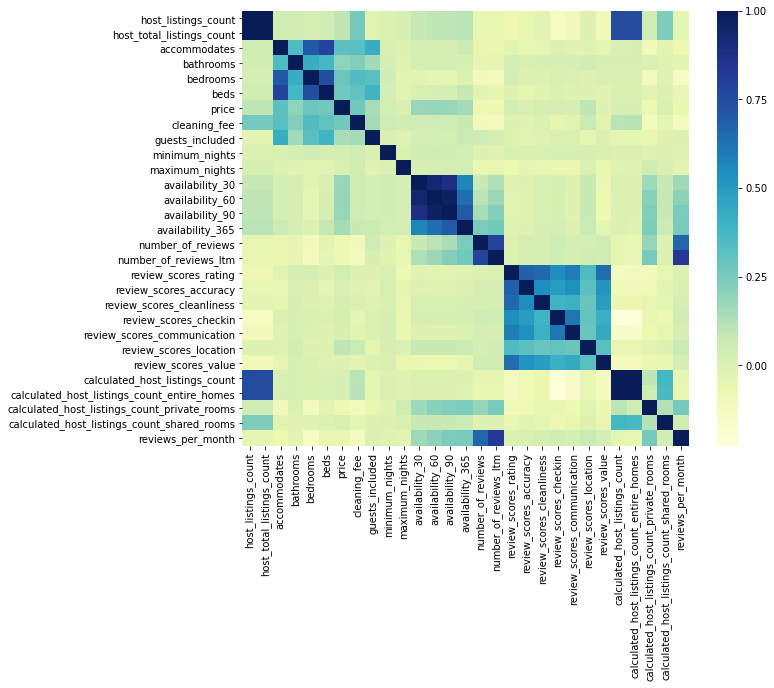

In [23]:
#plot correlation matrix to identiy columns that can be dropped due to collinearity
plt.figure(figsize=(10,8))
num_df = final_data_1[num_cols]
sns.heatmap(num_df.corr(),cmap="YlGnBu")

In [24]:
redundant_columns = ["availability_60","availability_90","beds","calculated_host_listings_count_entire_homes",
                    'number_of_reviews_ltm',"reviews_per_month",'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location']

In [25]:
#data after engineering
airbnb = final_data_1.drop(redundant_columns, axis=1)
airbnb.head()

,id,name,summary,description,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,...,maximum_nights,calendar_updated,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count
0,2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi I'm r...,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,"Amsterdam, North Holland, Netherlands",...,15,today,8,89,267,98.0,10.0,t,strict_14_with_grace_period,1
1,20168,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...","Cozy studio on your own private floor, 100% in...",f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,"Amsterdam, North Holland, Netherlands",...,1000,today,0,124,283,88.0,9.0,f,strict_14_with_grace_period,2
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,,"This nicely furnished, newly renovated apt is...",f,2.0,2.0,"['email', 'phone', 'reviews']",f,"Amsterdam, North Holland, Netherlands",...,60,today,4,75,3,100.0,10.0,f,strict_14_with_grace_period,2
3,27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,Stylish and romantic houseboat on fantastic hi...,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,"Amsterdam, North Holland, Netherlands",...,730,today,6,66,195,99.0,10.0,t,strict_14_with_grace_period,1
4,28871,Comfortable double room,,In a monumental house right in the center of A...,t,3.0,3.0,"['email', 'phone', 'reviews', 'jumio']",t,"Amsterdam, North Holland, Netherlands",...,1825,3 days ago,2,138,283,97.0,10.0,f,moderate,3


## 3. Exploratory Data Analysis

Some potential questions:
- Is there a difference in price and ratings for verifies and un-verified host?
- Is there a difference in price and ratings for host and superhost?
- Is there a difference in price for available and unavailable homes?
- Is there a difference in price for different cancellation policy?
- Is there a difference in price for different property type?
- Is there a difference in price for number of amenities?
- Are there differences for neighbourhoods?
- Do high ratings correspond to higher price?


### Host Verification

(0.0, 500.0)

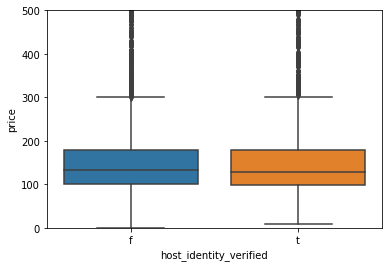

In [26]:
#verified and un-verified host
sns.boxplot("host_identity_verified","price",data = airbnb)
plt.ylim(0,500)

There are many outliers: home with very high price, but in general, they have similar median values, so not a huge difference between verified and un-verified host

(0.0, 100.0)

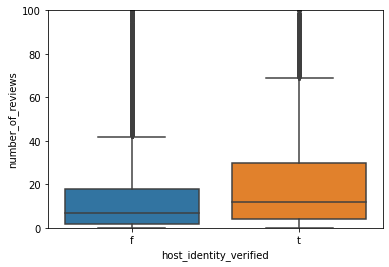

In [27]:
#number of reviews
sns.boxplot("host_identity_verified","number_of_reviews",data = airbnb)
plt.ylim(0,100)

(80.0, 100.0)

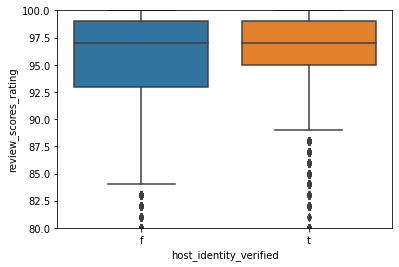

In [28]:
#review rating
sns.boxplot("host_identity_verified",'review_scores_rating', data=airbnb)
plt.ylim(80,100)

Verified hosts have more reviews than unverified hosts and have higher ratings, unverified hosts have more bad ratings.

### Superhost

(0.0, 500.0)

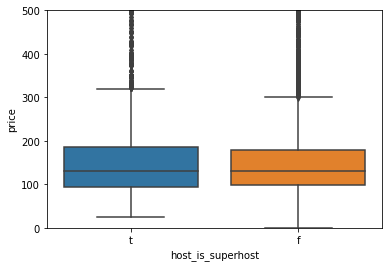

In [29]:
#superhost or not
sns.boxplot("host_is_superhost","price",data = airbnb)
plt.ylim(0,500)

Similar to verification of host, in general, there is not a large difference in price between superhost and non-superhost, though it seems that price has more variability for superhost.

(0.0, 100.0)

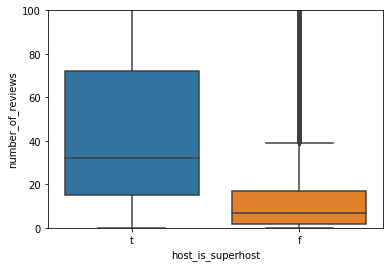

In [30]:
#number of reviews 
sns.boxplot("host_is_superhost","number_of_reviews",data = airbnb)
plt.ylim(0,100)

(80.0, 100.0)

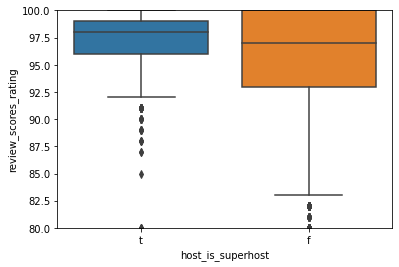

In [31]:
#review ratings
sns.boxplot("host_is_superhost",'review_scores_rating', data=airbnb)
plt.ylim(80,100)

### Availability

<AxesSubplot:xlabel='availability_30', ylabel='price'>

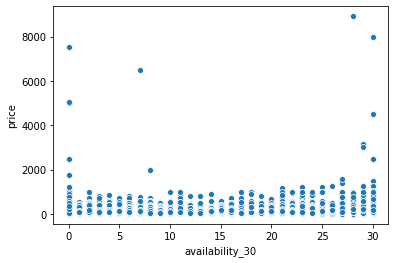

In [32]:
#availability in 30 days and price
sns.scatterplot("availability_30",'price', data=airbnb)

<AxesSubplot:xlabel='availability_365', ylabel='price'>

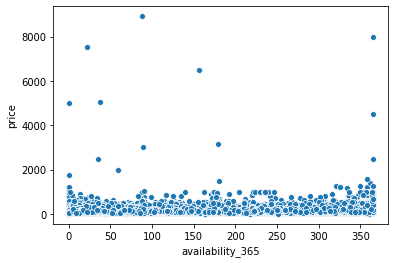

In [33]:
#availability in 365 days and price
sns.scatterplot("availability_365",'price', data=airbnb)

No strong relationship between number of available nights and price

### Neighborhoods

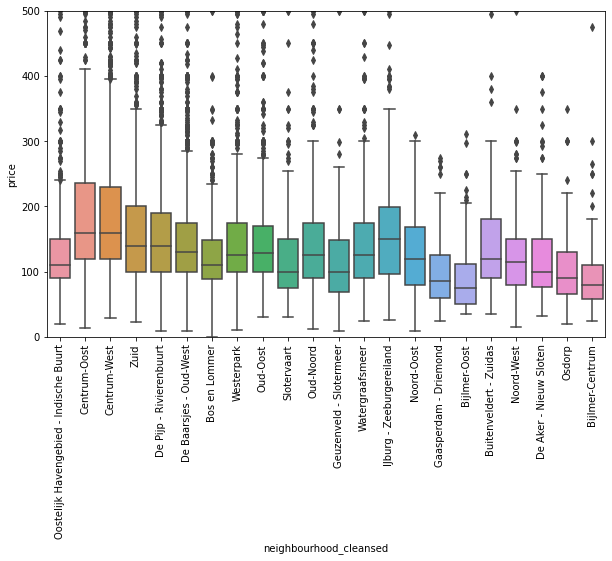

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot("neighbourhood_cleansed","price", data=airbnb)
plt.ylim(0,500)
a = plt.xticks(rotation=90)

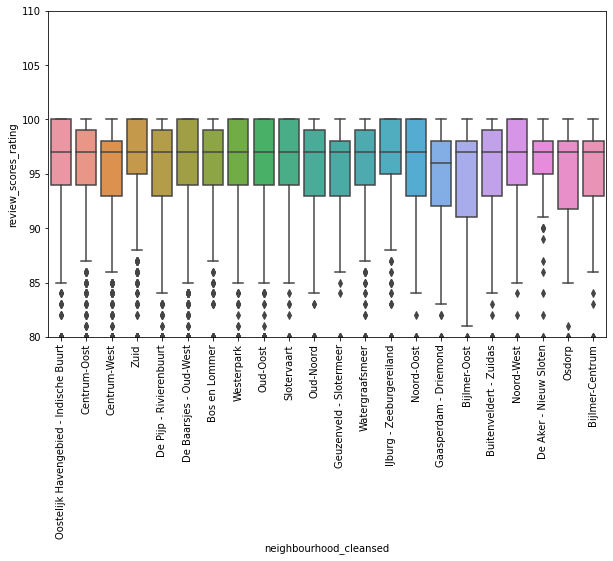

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot("neighbourhood_cleansed","review_scores_rating", data=airbnb)
plt.ylim(80,110)
a = plt.xticks(rotation=90)

Centrum-Oost appears to have higher price than other neighbourhoods and Bijlmer-Oost appears to have lowest median price. In general, there are significant differences among neighborhoods, though they all have outliers, and outliers extremity correponds to their respective median price. Ratings are very similar based on medians, Driemond seems to have lower median ratings compared with others.

### Cancellation Policy

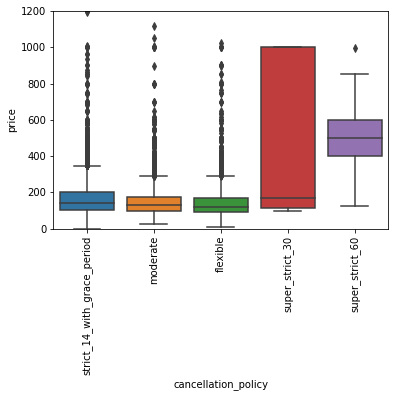

In [36]:
#plt.figure(figsize=(10,6))
sns.boxplot("cancellation_policy","price", data=airbnb)
plt.ylim(0,1200)
a = plt.xticks(rotation=90)

Flexible policy correponds to lowest median price and super strict 60 days has highest median price. Super_strict_30 has a usual median level but upper IQR range almost reaches 1000, indicating the distribution of prices for that policy is significantly different, it might be that there are much fewer data points using that policy.

In [37]:
#As expected, only 100+ homes have super strict policy, most homes have strict_14_with_grace_period policy
airbnb["cancellation_policy"].value_counts()

strict_14_with_grace_period    8004
moderate                       7492
flexible                       5043
super_strict_60                 112
super_strict_30                  26
Name: cancellation_policy, dtype: int64

### Property Type

In [38]:
prop_types = airbnb["property_type"].value_counts()

In [39]:
#Assign low freq types to "Other"
low_freq_type = list(airbnb["property_type"].value_counts()[airbnb["property_type"].value_counts()<20].index)
low_freq_type

['Tiny house',
 'Cottage',
 'Cabin',
 'Camper/RV',
 'Chalet',
 'Bungalow',
 'Casa particular (Cuba)',
 'Barn',
 'Yurt',
 'Campsite',
 'Castle',
 'Hut',
 'Dome house',
 'Earth house',
 'Tent',
 'Nature lodge',
 'Lighthouse',
 'Island']

In [40]:
airbnb.loc[:,"property_type"] = airbnb["property_type"].apply(lambda x: "Other" if x in low_freq_type else x)

In [41]:
#replace low frequency types with "Other"
airbnb["property_type"].value_counts()

Apartment             15832
House                  1641
Townhouse               671
Bed and breakfast       549
Loft                    392
Boat                    351
Condominium             334
Houseboat               290
Guest suite             146
Aparthotel              119
Other                   100
Serviced apartment       69
Guesthouse               49
Boutique hotel           43
Villa                    39
Hostel                   29
Hotel                    23
Name: property_type, dtype: int64

(0.0, 1200.0)

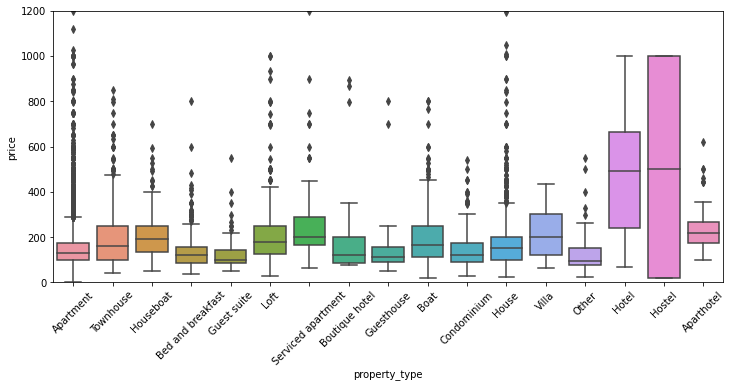

In [42]:
plt.figure(figsize=(12,5))
sns.boxplot("property_type","price", data=airbnb)
a = plt.xticks(rotation=45)
plt.ylim(0,1200)

(70.0, 120.0)

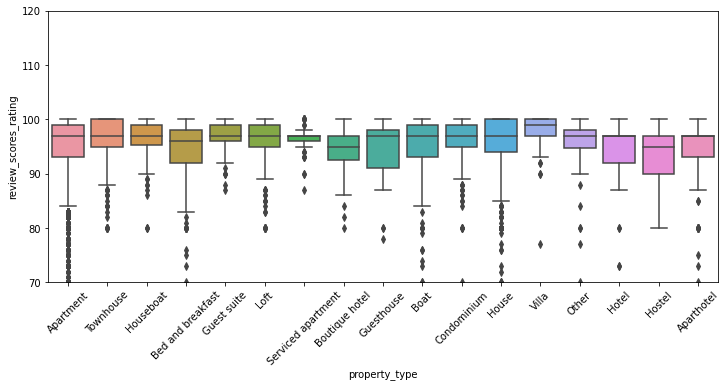

In [43]:
plt.figure(figsize=(12,5))
sns.boxplot("property_type","review_scores_rating", data=airbnb)
a = plt.xticks(rotation=45)
plt.ylim(70,120)

Based on boxplot above, there are significant difference in price among different property types, most of the homes are apartments. Hotel and hostel appear to be most expensive.

### Number of Amenities

The structure and content of amenities column are a little bit inconsistent, and some of them with irrelavant words. Therefore, assume that homes with more amenities will definitely cover those basic amenities, therefore, the length of amenities arrays can be used to approximate the number of services included.

In [44]:
num_amenities = airbnb['amenities'].apply(lambda x: len(x.split(",")))
#home with largest number of amenities
airbnb['amenities'][num_amenities==max(num_amenities)].values

array(['{TV,"Cable TV",Wifi,"Air conditioning",Kitchen,"Free parking on premises","Paid parking off premises",Gym,Breakfast,"Hot tub","Indoor fireplace",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room","Private entrance","Baby monitor","Outlet covers",Bathtub,"Baby bath","Changing table","High chair","Stair gates","Children’s books and toys","Fireplace guards","Babysitter recommendations",Crib,"Pack ’n Play/travel crib","Room-darkening shades","Children’s dinnerware","Game console","Hot water","Bed linens","Extra pillows and blankets","Ethernet connection",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,Stove,"Single level home","BBQ grill","Patio or balcony","Garden or backyard","Beach essentials","Luggage dropoff allowed","Wide hallways","Wide entra

(0.0, 1000.0)

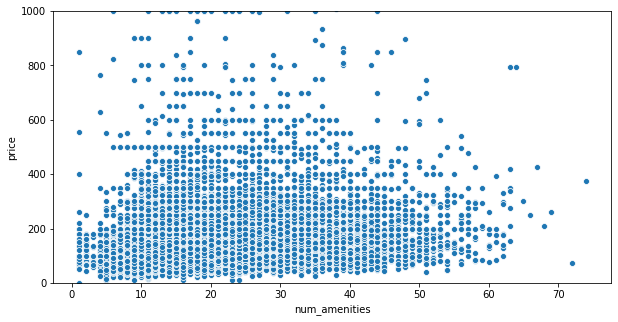

In [45]:
plt.figure(figsize=(10,5))
airbnb.loc[:,"num_amenities"] = num_amenities 
sns.scatterplot("num_amenities","price",data=airbnb)
plt.ylim(0,1000)

There seems to be a slightly positive relationship between number of amenities and price within range of 0 and 1000, which makes sense. However, there are several outliers (price > 1000) that do not fall into the pattern.

### Rating vs. Price

In [46]:
ratings_and_price = airbnb[['number_of_reviews','review_scores_rating', 'review_scores_value',"price"]]

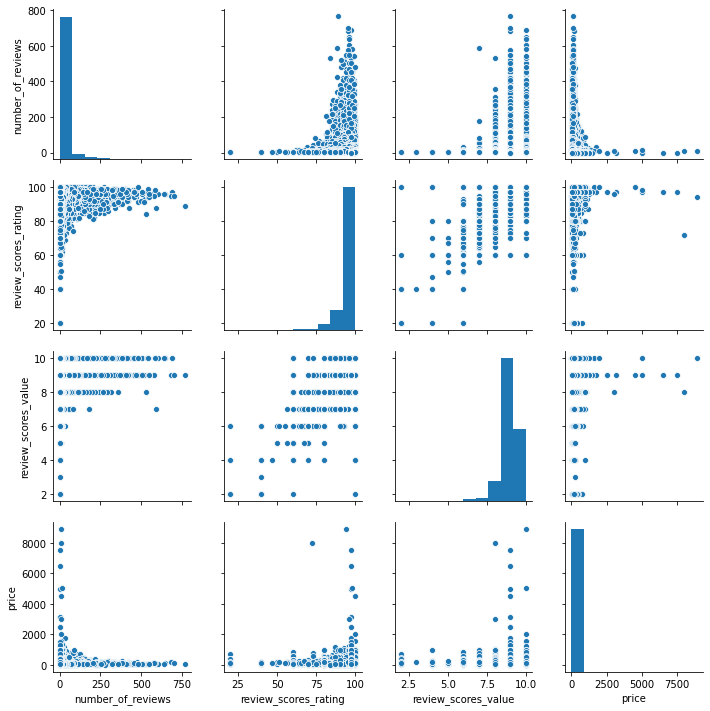

In [47]:
sns.pairplot(ratings_and_price)

Based on above pairplot, higher ratings generally have higher price, but more reviews do not mean higher price.

Further questions related to text columns:
- Which keywords appear most in name, description and summary?
- Are there correlations between frequencies of keywords and other metrics such as price and ratings?

In [48]:
#Find most common words in name
#remove stopwords using ntlk
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter
stop_words = set(stopwords.words('english'))
punc = string.punctuation
join_names = " ".join(airbnb["name"]).split()
joint_name_no_stop = [w for w in join_names if not w in stop_words and not w in punc]  
join_description = " ".join(airbnb["name"]).split()
join_description_no_stop = [w for w in join_description if not w in stop_words and not w in punc] 
join_summary = " ".join(airbnb["summary"]).split()
join_summary_no_stop = [w for w in join_summary if not w in stop_words and not w in punc] 

In [49]:
#most frequent 100 words for these three columns
name_pop_words = Counter(joint_name_no_stop).most_common(100)
description_pop_words = Counter(join_description_no_stop).most_common(100)
summary_pop_words = description_pop_words = Counter(join_summary_no_stop).most_common(100)

In [50]:
#common words among three groups of words
common_words = []
description_list = [w[0] for w in description_pop_words]
summary_list = [w[0] for w in summary_pop_words]
for w in name_pop_words:
    if w[0] in description_list and summary_list:
        common_words.append(w)
common_words[20:30] #example frequent words

[('next', 387),
 ('modern', 383),
 ('Central', 374),
 ('bright', 372),
 ('central', 351),
 ('cosy', 349),
 ('quiet', 343),
 ('balcony', 335),
 ('great', 334),
 ('heart', 324)]

In [51]:
#Based on common_words list some keywords frequently appear in texts
keywords = ["center","garden","family","spacious","private","bright","central","cosy",
           "quiet","balcony","heart","beautiful","min","renovated"]

In [52]:
#focus on name
for j in keywords:
    airbnb.loc[:,j] = airbnb["name"].apply(lambda x:int(j in x.split()))

(0.0, 500.0)

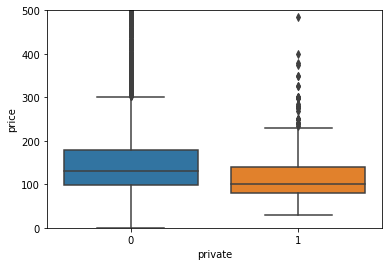

In [53]:
sns.boxplot("private","price",data=airbnb)
plt.ylim(0,500)

(0.0, 500.0)

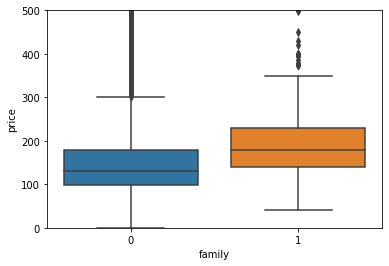

In [54]:
sns.boxplot("family","price",data=airbnb)
plt.ylim(0,500)

(0.0, 500.0)

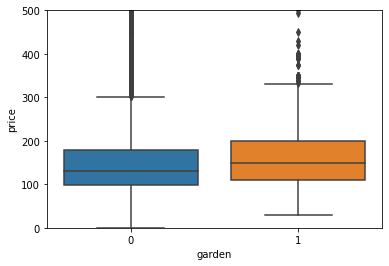

In [55]:
sns.boxplot("garden","price",data=airbnb)
plt.ylim(0,500)

Based on visualizations, it seems that some keywords can indicate differences in price.

## 4. Predicting Price

### Check Model Assumptions

<AxesSubplot:xlabel='price'>

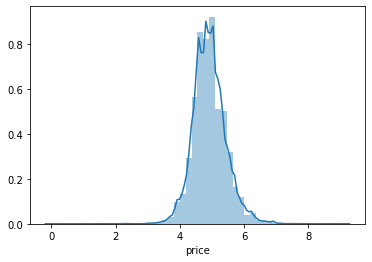

In [56]:
sns.distplot(np.log(airbnb["price"]+1))

Original price column is very skewed, making a log transform seems much more reasonable, with a roughly normal shape.

<AxesSubplot:xlabel='review_scores_value', ylabel='price'>

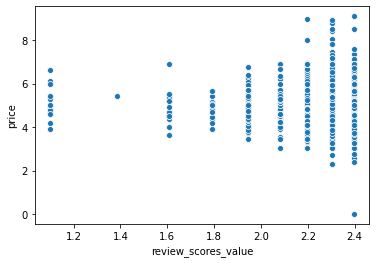

In [57]:
sns.scatterplot(np.log(airbnb['review_scores_value']+1),np.log(airbnb["price"]+1))

### Feature Selection and Engineer
- Encode categorical features.
- Exclude complicated columns such as text and amenities columns
- Include columns newly created in EDA step, such as number of amenities and keywords indicators
- Transform some predictor columns to make the relationship more linear

In [58]:
y = np.log(airbnb["price"]+1)
X_1 = airbnb.drop(["id","name","summary","description","amenities","price",'calendar_updated',"extra_people","host_verifications",'street'], axis=1)

In [59]:
X = pd.get_dummies(X_1, drop_first=True)

In [60]:
X.loc[:,'review_scores_rating'] = np.log(X['review_scores_rating']+1)
X.loc[:,'review_scores_value'] = np.log(X['review_scores_value']+1)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression,LassoLarsCV
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.5267705207888944

In [63]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
mod = sm.OLS(y,X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     318.3
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:09:14   Log-Likelihood:                -7621.6
No. Observations:               20677   AIC:                         1.540e+04
Df Residuals:                   20601   BIC:                         1.600e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                             2.1255      0.155     13.680      0.000       1.821       2.430
host_listings_count                                               0.0003   7.62e-05      3.469      0.001       0.000       0.000
host_total_listings_count                                         0.0003   7.62e-05      3.469      0.001       0.000       0.000
accommodates                                                      0.0975      0.003     34.056      0.000       0.092       0.103
bathrooms                                                         0.0816      0.007     11.265      0.000       0.067       0.096
bedrooms                                                          0.0886      0.004     20.313      0.000       0.080       0.097
cleaning_fee                                                      0.0021      0.000     16.817      0.000       0.002       0.002
guests_included                                                   0.0036      0.003      1.232      0.218      -0.002       0.009
minimum_nights                                                   -0.0003      0.000     -2.622      0.009      -0.001   -8.69e-05
maximum_nights                                                 1.227e-05   4.62e-06      2.653      0.008     3.2e-06    2.13e-05
availability_30                                                   0.0105      0.000     24.932      0.000       0.010       0.011
availability_365                                                  0.0004   3.26e-05     11.707      0.000       0.000       0.000
number_of_reviews                                                -0.0008   5.94e-05    -14.170      0.000      -0.001      -0.001
review_scores_rating                                              0.5641      0.042     13.389      0.000       0.482       0.647
review_scores_value                                              -0.3321      0.040     -8.377      0.000      -0.410      -0.254
calculated_host_listings_count                                   -0.0014      0.000     -6.859      0.000      -0.002      -0.001
num_amenities                                                     0.0041      0.000     14.713      0.000       0.004       0.005
center                                                            0.0142      0.012      1.185      0.236      -0.009       0.038
garden                                                            0.0133      0.011      1.185      0.236      -0.009       0.035
family                                                           -0.0196      0.014     -1.403      0.161      -0.047       0.008
spacious                                                          0.0185      0.013      1.37

<AxesSubplot:ylabel='price'>

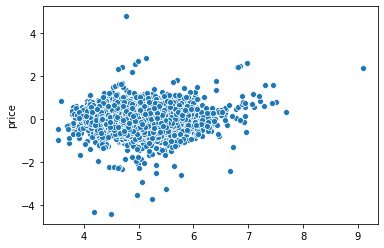

In [64]:
#residual vs. predicted, roughly cloud shape
sns.scatterplot(model.predict(X_train),model.predict(X_train)-y_train)

Although R-squared is only a little bit above 0.5, significant predictors can still be observed by observing p-values in the summary table. Being instant bookable, having more accomadates, more cleaning fee and having more amenities correspond to higher prices. Having room type as shared decreases price, increase in minimum nights decreases price slightly.

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 300,
          'loss': 'ls'}
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
reg.score(X_test,y_test)

0.6183577209123599

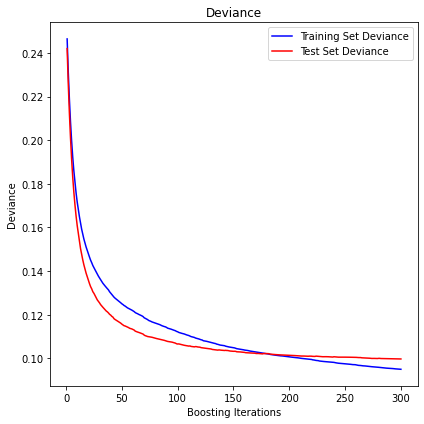

In [67]:

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Boosting increases performance by around 0.1 (score), test deviance begins to plateau after 300 iterations

## 5. Summary and Final Recommendations 

### Findings
1. The number of homes distributed across neightborhoods is different with different pricing, ratings are similar.
2. Property types are mostly apartments and townhomes; Hotels and hostels have expensive prices but very few of them are listed on Airbnb.
3. Ratings behave differently, and do not have a conform pattern with price.
4. Having super stric policy leads to expensive price.
5. Number of amenities generally leads to higher price but this is not true for all homes.

### For Host
1. Follow most common cancallation policy if possible, avoid super strict policy although it can indicate higher prices.
2. Emphasize keywords in name, description and summary, such as words indicating type and structure of room, words indicating size, and words indicating proximity and convenience.
3. Pricing for different property types are quite different, so price should be adjusted to acceptable price of that property type.
4. Neighborhoods are also quite different, need to adjust price accordingly. if home location close to a neighborhood with higher price, can emphasize "proximity but lower price"

### For Guests
1. More number of reviews does not correspond to higher prices, it can even indicate lower prices, therefore pay close attention to homes with enough reviews, but higher ratings generally correspond to higher price.
2. Homes with flexible cancellation policy might have lower price.
3. Some neighbourhoods are more expensive than others, can search for close neighborhoods with lower price.

### For Airbnb
1. Records of past average length of stay can be helpful in determining the major type of guests so both hosts and guests can have a better sense of what they should target in their search and advertisement.
2. Records of occupations of past guests (voluntary information) can be helpful as well in targeting customers.
3. Can further improve superhost program since being superhost increases both price and ratings.

## 6. Limitations and Further Research

There are some limitations in this analysis:
- Missing data pattern can be still further explored, currently, missing data are being treated missing at random.
- More data processing could be done to extract more features, for example, a vectorizer of text columns can be used to crease a sparse matrix for prediction, and amenities columns can be further cleaned.
- I did not remove outliers in this analysis, and there are many outliers shown in boxplots, so unreasonable price/ratings/location/availability can be checked further.
- Predicted power is not great, therefore this regression model can mainly serves as an explanatory model explaining importance of each feature.

Further research in this dataset can involve:
- Using first review, last review and calendar information to study the impact of time length on ratings and price.
- Collecting more relevant features and do more feature engineer to improve power of the regression model.
- Focus on ratings and comments to analyze what kinds of features of the home lead to higher ratings and satisfaction.